In [1]:
import models
import matplotlib.pyplot as p

run time: 0.211s


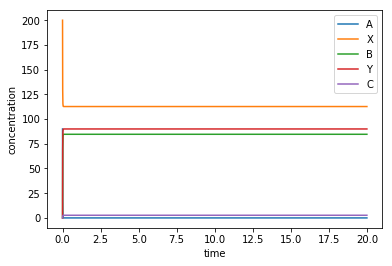

In [40]:
chem1 = models.Chemistry()
chem1.reaction('A+X=>B+Y')
chem1.reaction('B+A=>C+Y', k=0.1)
chem1.initial_concentrations(A=90, X=200)
chem1.time_stop = 20
chem1.run()

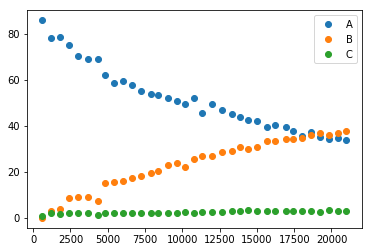

In [41]:
chem1.import_data('data/Expt1.csv')

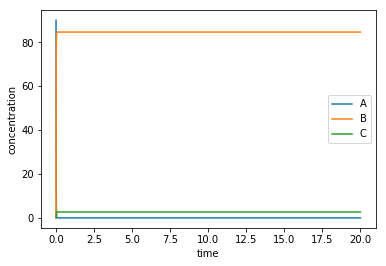

In [42]:
chem1.plot('A', 'B', 'C')

In [52]:
chem1.rate_constants = [1e-7,1e-9]
chem1.rate_constants

[1e-07, 1e-09]

run time: 0.006s


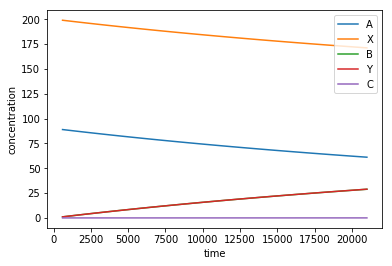

In [54]:
chem1.run()

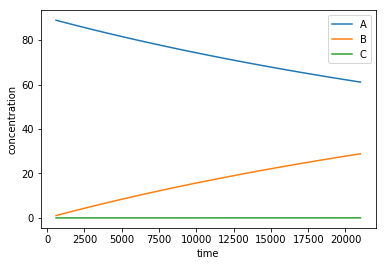

In [55]:
chem1.plot('A', 'B', 'C')

In [56]:
chem1.fit()

      fun: 1498.343564077087
 hess_inv: array([[8.77126791e-19, 2.82653615e-19],
       [2.82653615e-19, 3.44542844e-17]])
      jac: array([3617.86676025, 1363.69442749])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 352
      nit: 11
     njev: 85
   status: 2
  success: False
        x: array([2.30600665e-07, 3.69897732e-07])


KeyError: 0

run time: 0.006s


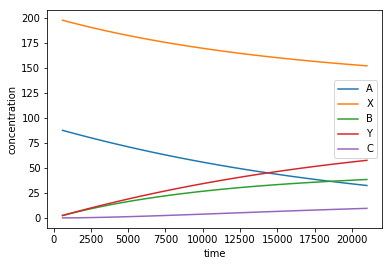

In [57]:
chem1.rate_constants = [2.30600665e-07, 3.69897732e-07]
chem1.run()

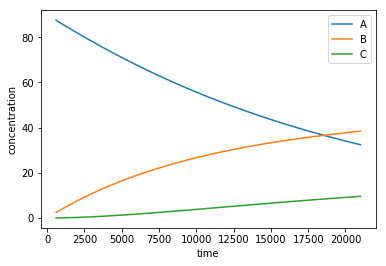

In [58]:
chem1.plot('A', 'B', 'C')

run time: 0.001s


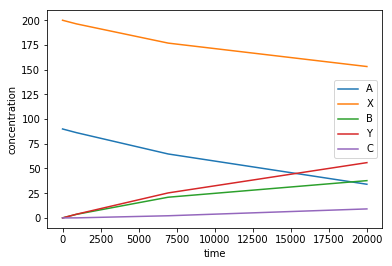

In [4]:
chem2 = models.Chemistry()
chem2.reaction('A+X=>B+Y', k = 2.30600665e-07)
chem2.reaction('B+A=>C+Y', k = 3.69897732e-07)
chem2.initial_concentrations(A=90, X=200)
chem2.time_stop = 20000
chem2.run()

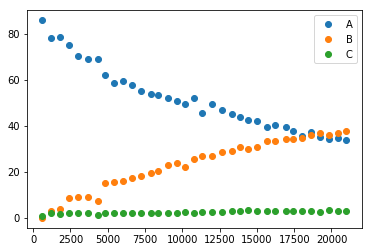

In [5]:
chem2.import_data('data/Expt1.csv')

run time: 0.002s


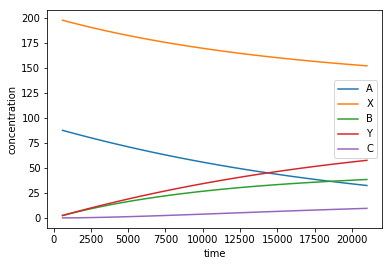

In [6]:
chem2.run()

Text(0.5, 1.0, 'model fitting')

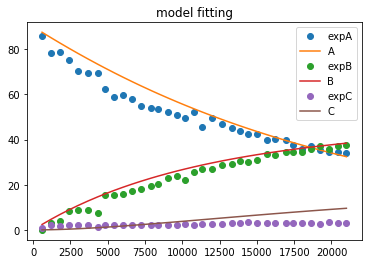

In [11]:
t = chem2.solution['t']
for k in chem2.data:
    if k!='Time (s)':
        p.plot(t, chem2.data[k], 'o', label = 'exp'+k)
        p.plot(t, chem2.solution[k], label = k)
p.legend()
p.title('model fitting')

In [23]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
@interact
def show(k = 1.0):
    chem2 = models.Chemistry()
    chem2.reaction('A+X=>B+Y', k = k)
    chem2.reaction('B+A=>C+Y', k = 1)
    chem2.initial_concentrations(A=1, X=1)
    chem2.time_stop = 100
    chem2.run()

interactive(children=(FloatSlider(value=1.0, description='k', max=3.0, min=-1.0), Output()), _dom_classes=('wi…